<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here"). No need to select answers in a webform.**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

**Read data**

In [2]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 321.9 KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [9]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [7]:
train_df.shape

(712, 10)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

CPU times: user 3.07 s, sys: 741 ms, total: 3.81 s
Wall time: 2.18 s


'Observations:\nMost People Irrespective of Age took cheap tickets for the Titanic(The scatter plot for Age vs Ticket Price shows that most people took the fare between 200-400 tickets)\n\nsibsp:Represents Siblings/Spouses on board the Titanic\nparch:No of Parents/Childrens\n\nWith Increasing no of siblings/Parents,people opted for cheaper fairs(As Expected)\n'

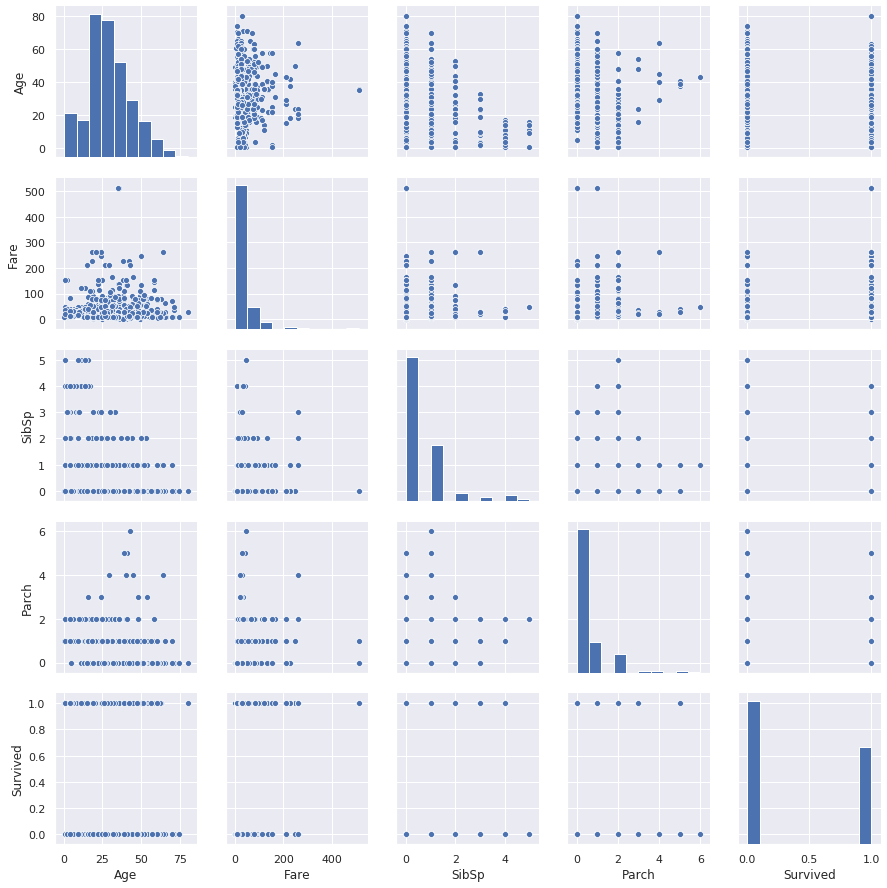

In [25]:
%%time
sns.pairplot(train_df[['Age','Fare','SibSp',"Parch",'Survived']])

# train_df[['Age','Fare','SibSp',"Parch",'Survived']]
'''Observations:
Most People Irrespective of Age took cheap tickets for the Titanic(The scatter plot for Age vs Ticket Price shows that most people took the fare between 200-400 tickets)

sibsp:Represents Siblings/Spouses on board the Titanic
parch:No of Parents/Childrens

With Increasing no of siblings/Parents,people opted for cheaper fairs(As Expected)
'''

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs


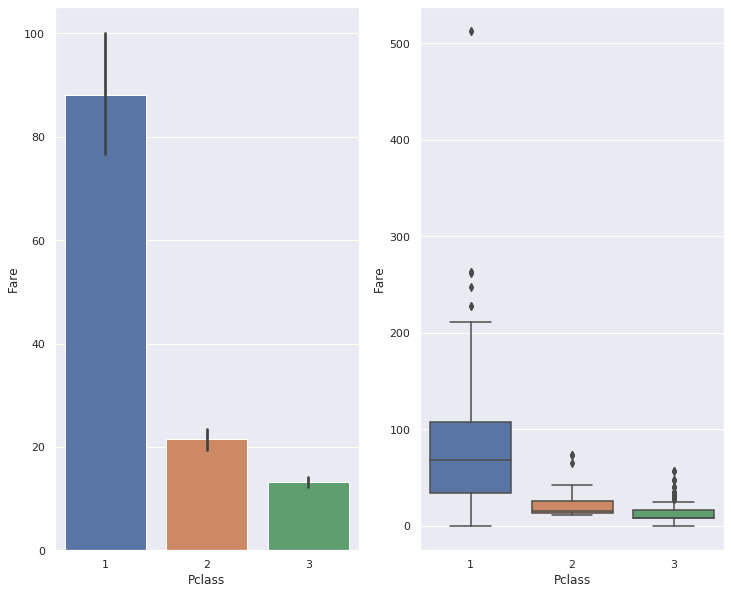

In [31]:
'''This graph represents a Numerical Quantity(Fare) grouped by Pclass(Categorical)
We can try building this using the seaborn barplot function and the boxplot with x as Fare and Y as Pclass

Using the Barplot,we can clearly see that First Class people bought more expensive tickets as compared to 2nd or 3 rd class people(As Expected due to income differences).In this the Black Line Illustrates Outliers which suggest that Richer People might have been scammed more on the ticket prices as compared to 2nd or 3rd class ticket holders.

Using the Boxplot,The Results of the BarPlot graph are shown in much more detail in the sense that the max price of a first class ticket was around 200,Median was around 80 and 3rd class ticket holders had the most amount of expensive tickets bought(outliers)
'''
%time
_,axis=plt.subplots(nrows=1,ncols=2,figsize=(12,10))
sns.barplot(x='Pclass',y='Fare',data=train_df,ax=axis[0])
sns.boxplot(x='Pclass',y='Fare',data=train_df,ax=axis[1])

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

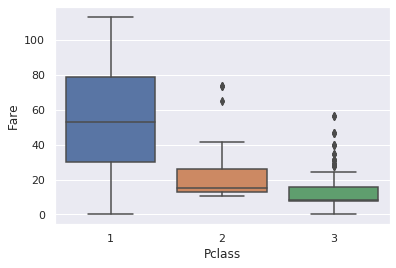

In [101]:
#I think that by mentioning that the fare  has to be less than the 95% quartile would mean to get the data which is less that 95% of the values(By eyeballing I say it's around 200) Numerical and Categorical Variable Interaction .Did now know about this quantile variable

sns.boxplot(x="Pclass",y="Fare",data=train_df[train_df['Fare']<train_df['Fare'].quantile(.95)])

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

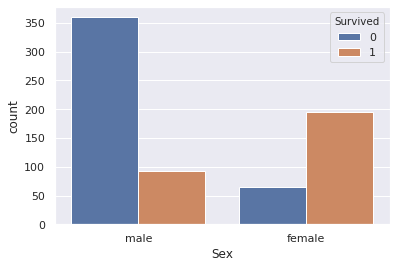

In [38]:
#Categorical Categorical Interaction We can see that Female Passengers were most Likely to Survive the Titanic(Possibly Because they were given high preference when they were getting evacuated from the ship or something.Poor Males :-( )

sns.countplot(x='Sex',hue="Survived",data=train_df)

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


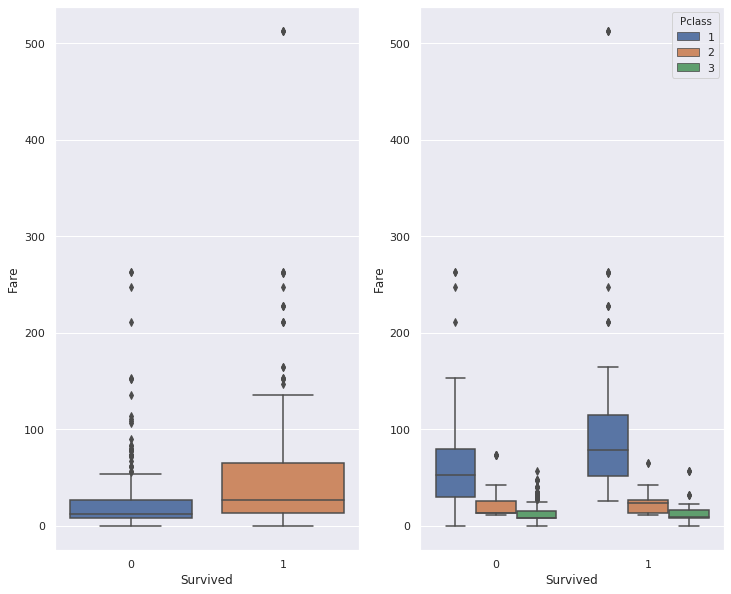

In [45]:
#Numerical vs Categorical In this,people who had Higher Fare Tickets had better chances of survival and as we have seen,higher fare tickets had been bought by First Class people and as seen on the right graph,they had the maximum no of survived people
%time
# 
_,axis=plt.subplots(nrows=1,ncols=2,figsize=(12,10))
sns.boxplot(x='Survived',y='Fare',data=train_df,ax=axis[0])
sns.boxplot(x='Survived',y='Fare',hue='Pclass',data=train_df,ax=axis[1])

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


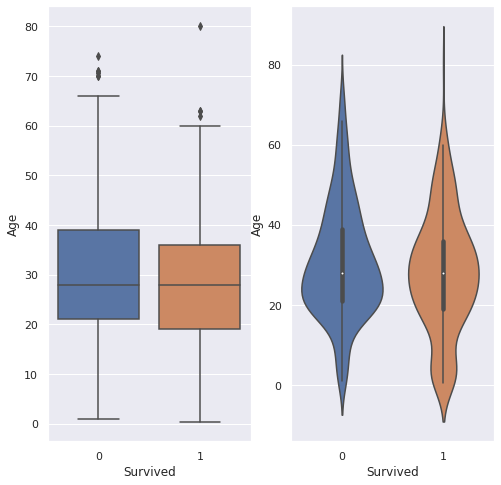

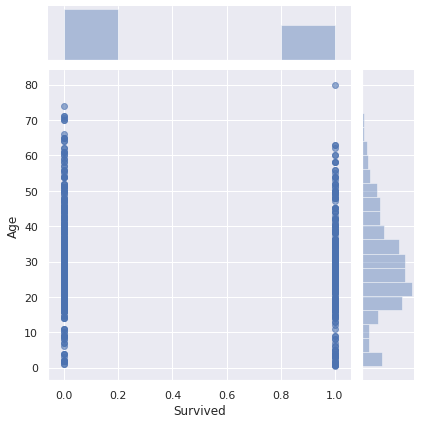

In [69]:
#Numerical and Categorical(Can use BoxPlot,Scatterplot,Violin Plot for this) Here Scatter Plot provides no useful insight since there are equal no of people survived and did not survive.Although it does tell us that people over 60 had much less chancecs of survival

#The box plot confirms the scatter plot observation
_,axis=plt.subplots(nrows=1,ncols=2,figsize=(8,8))
%time
sns.jointplot(x='Survived',y='Age',kind='scatter',data=train_df,alpha=.6)
sns.boxplot(x='Survived',y='Age',data=train_df,ax=axis[0])
sns.violinplot(x='Survived',y='Age',data=train_df,ax=axis[1])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


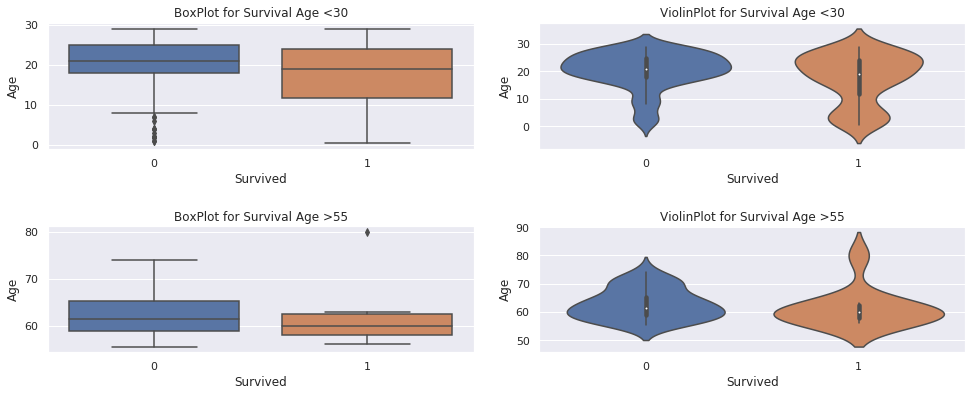

In [98]:
# From the violin and the Box plots,we can show that the density / frequency of people who survived is more for the <30 yr group and less for the >55 yr old group
_,axis=plt.subplots(nrows=2,ncols=2,figsize=(14,6))
%time

sns.boxplot(x='Survived',y='Age',data=train_df[train_df['Age']<30],ax=axis[0][0])
sns.violinplot(x='Survived',y='Age',data=train_df[train_df['Age']<30],ax=axis[0][1])
sns.boxplot(x='Survived',y='Age',data=train_df[train_df['Age']>55],ax=axis[1][0])
sns.violinplot(x='Survived',y='Age',data=train_df[train_df['Age']>55],ax=axis[1][1])

#For setting Title Per Subplot for Easier Identification
axis[0][0].title.set_text("BoxPlot for Survival Age <30")
axis[0][1].title.set_text("ViolinPlot for Survival Age <30")
axis[1][0].title.set_text("BoxPlot for Survival Age >55")
axis[1][1].title.set_text("ViolinPlot for Survival Age >55")
plt.tight_layout(2.5)

## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-practice-visualization) with a [solution](https://www.kaggle.com/kashnitsky/topic-2-practice-solution)
* Topic 2 "Visual data analysis in Python" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)